In [6]:
#apply cart on the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [7]:
#load dataset
data = pd.read_csv('parkinsons.data')

In [8]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming your dataframe is named df
selected_features = ['Shimmer:APQ3', 'spread2', 'D2', 'Shimmer:APQ5', 'DFA', 'RPDE', 'PPE']
X = data[selected_features]
y = data['status']  # Assuming 'status' is your target variable

# Initialize the model
model = DecisionTreeClassifier()  # For classification tasks

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dataframe with feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features
selected_features = feature_importance_df.head(5)['Feature'].tolist()

print("Selected Features:", selected_features)


Selected Features: ['PPE', 'D2', 'RPDE', 'Shimmer:APQ3', 'Shimmer:APQ5']


In [10]:
#print accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 5  2]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



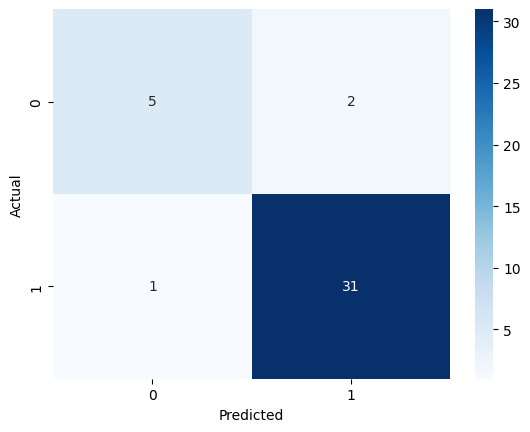

In [11]:
#heat map of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
